#### generate vec from molecule
- [mol2vec.features.generate_corpus](https://mol2vec.readthedocs.io/en/latest/#mol2vec.features.generate_corpus)
- [mol2vec.features.train_word2vec_model](https://mol2vec.readthedocs.io/en/latest/#mol2vec.features.train_word2vec_model)


In [26]:
# from mol2vec import features
import pickle
from rdkit.Chem import PandasTools
from gensim.models import word2vec
from mol2vec.features import generate_corpus, train_word2vec_model, mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec

,ID,PUBCHEM_ATOM_DEF_STEREO_COUNT,PUBCHEM_ATOM_UDEF_STEREO_COUNT,PUBCHEM_BONDANNOTATIONS,PUBCHEM_BOND_DEF_STEREO_COUNT,PUBCHEM_BOND_UDEF_STEREO_COUNT,PUBCHEM_CACTVS_COMPLEXITY,PUBCHEM_CACTVS_HBOND_ACCEPTOR,PUBCHEM_CACTVS_HBOND_DONOR,PUBCHEM_CACTVS_ROTATABLE_BOND,...,PUBCHEM_IUPAC_SYSTEMATIC_NAME,PUBCHEM_IUPAC_TRADITIONAL_NAME,PUBCHEM_MOLECULAR_FORMULA,PUBCHEM_MOLECULAR_WEIGHT,PUBCHEM_MONOISOTOPIC_WEIGHT,PUBCHEM_OPENEYE_CAN_SMILES,PUBCHEM_OPENEYE_ISO_SMILES,PUBCHEM_TOTAL_CHARGE,PUBCHEM_XLOGP3_AA,ROMol
0,50105823,0,2,21 23 3\n24 26 3\n30 31 8\n30 32 8\n31 35 8\n32 34 8\n33 38 8\n33 39 8\n34 37 8\n35 37 8\n38 40 8\n39 42 8\n40 43 8\n42 43 8\n45 46 8\n45 47 8\n46 48 8\n47 49 8\n48 50 8\n49 50 8,0,0,1190,10,4,10,...,"1-[1-[[5-[[3,4-bis(fluoranyl)phenyl]carbamoyl]-2-methyl-phenyl]amino]-1-oxidanylidene-propan-2-yl]-N-[1-[[2-chloranyl-5-(trifluoromethyl)phenyl]amino]-3-methyl-1-oxidanylidene-butan-2-yl]piperidine-4-carboxamide","N-[1-[[2-chloro-5-(trifluoromethyl)phenyl]carbamoyl]-2-methyl-propyl]-1-[2-[5-[(3,4-difluorophenyl)carbamoyl]-2-methyl-anilino]-2-keto-1-methyl-ethyl]isonipecotamide",C35H37ClF5N5O4,722.1,721.245423,CC1=C(C=C(C=C1)C(=O)NC2=CC(=C(C=C2)F)F)NC(=O)C(C)N3CCC(CC3)C(=O)NC(C(C)C)C(=O)NC4=C(C=CC(=C4)C(F)(F)F)Cl,CC1=C(C=C(C=C1)C(=O)NC2=CC(=C(C=C2)F)F)NC(=O)C(C)N3CCC(CC3)C(=O)NC(C(C)C)C(=O)NC4=C(C=CC(=C4)C(F)(F)F)Cl,0,6.5,

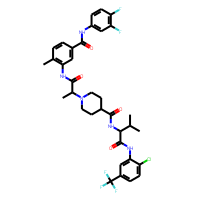

In [20]:
mols = PandasTools.LoadSDF('../demo_data/Compound_050000001_050500000.sdf')
mols.head(1)

In [36]:
dir(mols.loc[0, 'ROMol'])

['AddConformer',
 'ClearComputedProps',
 'ClearProp',
 'Compute2DCoords',
 'ComputeGasteigerCharges',
 'Debug',
 'GetAromaticAtoms',
 'GetAtomWithIdx',
 'GetAtoms',
 'GetAtomsMatchingQuery',
 'GetBondBetweenAtoms',
 'GetBondWithIdx',
 'GetBonds',
 'GetBoolProp',
 'GetConformer',
 'GetConformers',
 'GetDoubleProp',
 'GetIntProp',
 'GetNumAtoms',
 'GetNumBonds',
 'GetNumConformers',
 'GetNumHeavyAtoms',
 'GetProp',
 'GetPropNames',
 'GetPropsAsDict',
 'GetRingInfo',
 'GetStereoGroups',
 'GetSubstructMatch',
 'GetSubstructMatches',
 'GetUnsignedProp',
 'HasProp',
 'HasSubstructMatch',
 'NeedsUpdatePropertyCache',
 'RemoveAllConformers',
 'RemoveConformer',
 'SetBoolProp',
 'SetDoubleProp',
 'SetIntProp',
 'SetProp',
 'SetUnsignedProp',
 'ToBinary',
 'UpdatePropertyCache',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getinitargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init

In [27]:
# generate sentences from SDF
generate_corpus('../demo_data/Compound_050000001_050500000.sdf', './mols_demo_corpus.txt', r=1, sentence_type='alt', n_jobs=2)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


% molecules successfully processed.


[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    3.7s finished


In [4]:
train_word2vec_model('./mols_demo_corpus.txt', outfile_name='mols_demo_model.pkl', vector_size=150, window=10, min_count=3, n_jobs=2, method='skip-gram')

Runtime:  0.0  minutes


In [22]:
model = word2vec.Word2Vec.load('./mols_demo_model.pkl')
model

In [23]:
dir(model)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__ignoreds',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__numpys',
 '__recursive_saveloads',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__scipys',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_check_input_data_sanity',
 '_check_training_sanity',
 '_clear_post_train',
 '_do_train_epoch',
 '_do_train_job',
 '_get_job_params',
 '_get_thread_working_mem',
 '_job_producer',
 '_load_specials',
 '_log_epoch_end',
 '_log_epoch_progress',
 '_log_progress',
 '_log_train_end',
 '_minimize_model',
 '_raw_word_count',
 '_save_specials',
 '_set_train_params',
 '_smart_save',
 '_train_epoch',
 '_train_epoch_corpusfile',
 '_update_job_params',
 '_worker_loop',
 '_worker_loop_corpusfile',


In [30]:
mols['sentence'] = mols.apply(lambda x: MolSentence(mol2alt_sentence(x['ROMol'], 1)), axis=1)
mols['mol2vec'] = [DfVec(x) for x in sentences2vec(mols['sentence'], model)]

,ID,PUBCHEM_ATOM_DEF_STEREO_COUNT,PUBCHEM_ATOM_UDEF_STEREO_COUNT,PUBCHEM_BONDANNOTATIONS,PUBCHEM_BOND_DEF_STEREO_COUNT,PUBCHEM_BOND_UDEF_STEREO_COUNT,PUBCHEM_CACTVS_COMPLEXITY,PUBCHEM_CACTVS_HBOND_ACCEPTOR,PUBCHEM_CACTVS_HBOND_DONOR,PUBCHEM_CACTVS_ROTATABLE_BOND,...,PUBCHEM_MOLECULAR_FORMULA,PUBCHEM_MOLECULAR_WEIGHT,PUBCHEM_MONOISOTOPIC_WEIGHT,PUBCHEM_OPENEYE_CAN_SMILES,PUBCHEM_OPENEYE_ISO_SMILES,PUBCHEM_TOTAL_CHARGE,PUBCHEM_XLOGP3_AA,ROMol,sentence,mol2vec
0,50105823,0,2,21 23 3\n24 26 3\n30 31 8\n30 32 8\n31 35 8\n32 34 8\n33 38 8\n33 39 8\n34 37 8\n35 37 8\n38 40 8\n39 42 8\n40 43 8\n42 43 8\n45 46 8\n45 47 8\n46 48 8\n47 49 8\n48 50 8\n49 50 8,0,0,1190,10,4,10,...,C35H37ClF5N5O4,722.1,721.245423,CC1=C(C=C(C=C1)C(=O)NC2=CC(=C(C=C2)F)F)NC(=O)C(C)N3CCC(CC3)C(=O)NC(C(C)C)C(=O)NC4=C(C=CC(=C4)C(F)(F)F)Cl,CC1=C(C=C(C=C1)C(=O)NC2=CC(=C(C=C2)F)F)NC(=O)C(C)N3CCC(CC3)C(=O)NC(C(C)C)C(=O)NC4=C(C=CC(=C4)C(F)(F)F)Cl,0,6.5,,"(1016841875, 3452535345, 882399112, 485463469, 882399112, 485463469, 882399112, 485463469, 882399112, 3337745083, 882399112, 3337745083, 864942730, 1510328189, 864942730, 1510328189, 864942730, 1510328189, 864942730, 1510328189, 2092489639, 443741425, 847961216, 1362518133, 847961216, 1790668568, 847961216, 1790668568, 847961216, 1790668568, 2976033787, 2110118862, 2968968094, 2117068077, 2968968094, 2117068077, 2968968094, 2803848648, 2968968094, 2803848648, 2245273601, 826682052, 2246699815, 2806018737, 2246728737, 3537119515, 2245273601, 4066851934, 2246699815, 4222851645, 2245273601, 3004333805, 2246699815, 4222851645, 2246728737, 3537119515, 2246728737, 3537119515, 3217380708, 4041573576, 3217380708, 3124581743, 3218693969, 994485099, 3217380708, 4041573576, 3217380708, 2994748777, 3218693969, 951226070, 2246728737, 422715066, 3218693969, 951226070, 3218693969, 994485099, 3217380708, 2424973678, 3217380708, 3933537673, 2246699815, 1054767590, 3218693969, 951226070, 3218693969, 951226070, 2245277810, 1312131881, 3217380708, 3918336191, 3218693969, 994485099, 3218693969, 951226070, 3217380708, 1857396528, 3218693969, 951226070, 3217380708, 1857396528)","(150,) dimensional vector"
1,50187615,0,1,16 23 3\n27 31 8\n27 32 8\n28 30 8\n28 33 8\n29 35 8\n29 36 8\n30 31 8\n32 33 8\n35 37 8\n36 38 8\n37 39 8\n38 39 8\n41 42 8\n41 43 8\n42 44 8\n43 45 8\n44 46 8\n45 46 8,0,0,1050,5,3,8,...,C36H42ClN5O4,644.2,643.292532,CC1CCN(CC1)C(=O)C2=CC(=C(C=C2)NC(=O)C(C)N3CCC(CC3)C(=O)NC4=C(C=CC(=C4)C(=O)NC5=CC=CC=C5)Cl)C,CC1CCN(CC1)C(=O)C2=CC(=C(C=C2)NC(=O)C(C)N3CCC(CC3)C(=O)NC4=C(C=CC(=C4)C(=O)NC5=CC=CC=C5)Cl)C,0,5.5,,"(1016841875, 3452535345, 864942730, 1510328189, 864942730, 1510328189, 864942730, 1510328189, 864942730, 1510328189, 2092489639, 443741425, 2092489639, 435232729, 847961216, 1790668568, 847961216, 1790668568, 847961216, 1790668568, 2976033787, 2110118862, 2968968094, 2117068077, 2968968094, 2117068077, 2968968094, 2803848648, 2968968094, 2803848648, 2245273601, 826682052, 2976033787, 1228815484, 2968968094, 2117068077, 2968968094, 2117068077, 2968968094, 2803848648, 2968968094, 2803848648, 2246699815, 2806018737, 2246728737, 3537119515, 2246699815, 4222851645, 2246728737, 1858577693, 2246699815, 729796064, 3217380708, 2994748777, 3217380708, 4041573576, 3217380708, 4041573576, 3217380708, 3124581743, 3218693969, 994485099, 3218693969, 951226070, 3218693969, 951226070, 2246728737, 422715066, 3218693969, 994485099, 3217380708, 2424973678, 3217380708, 2994748777, 3218693969, 951226070, 3218693969, 951226070, 2246699815, 1054767590, 3217380708, 3918336191, 3218693969, 951226070, 3218693969, 951226070, 3218693969, 98513984, 3218693969, 98513984, 3218693969, 98513984)","(150,) dimensional vector"
2,50214148,0,1,22 26 3\n31 34 8\n31 36 8\n32 35 8\n32 38 8\n34 37 8\n35 41 8\n36 39 8\n37 40 8\n38 42 8\n39 40 8\n41 44 8\n42 44 8\n47 48 8\n47 49 8\n48 50 8\n49 51 8\n50 52 8\n51 52 8,0,0,1220,7,5,13,...,C39H46ClFN6O5,733.3,732.320224,CC1=C(C=CC(=C1)C(=O)NCC2=CC=C(C=C2)F)NC(=O)C(C)N3CCC(CC3)C(=O)NCCC(=O)NC4=C(C=CC(=C4)C(=O)NC5CCCC5)
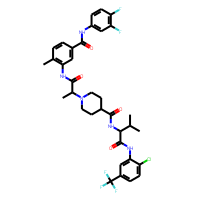
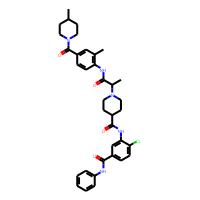
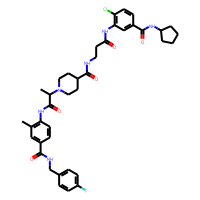
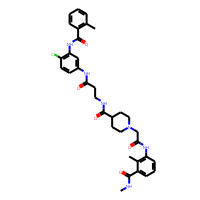
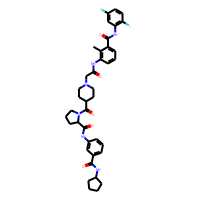
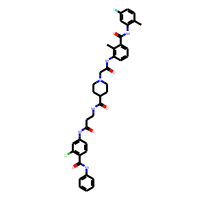

In [31]:
mols

In [34]:
mols.iloc[0, -1].vec

array([ -3.163416  ,  -3.444489  ,   0.3423347 ,   6.1286573 ,
        -6.4080954 ,  -7.2046638 ,  -2.738672  ,  -3.8686671 ,
        -3.6556787 ,   3.0126772 ,   6.662018  ,   1.9426045 ,
        -1.6632701 ,  -3.4405675 ,  -5.052578  ,   3.8563728 ,
         4.281919  ,  -5.6487947 ,   3.3372507 ,   2.2246356 ,
         1.5182587 ,  -4.3527555 ,   7.8794246 ,  -1.7301332 ,
         2.9903855 ,  -5.243455  ,   1.4700975 ,  -8.210229  ,
         5.1636953 ,  -4.180111  ,  -6.416998  ,   2.78514   ,
        -2.8834012 ,   1.5878128 ,   1.8398767 ,   0.85366875,
        -5.6358023 ,  -7.136352  ,  -3.8797488 ,  -0.7220208 ,
         1.7275028 ,   1.6173979 ,   3.8431747 ,   3.904078  ,
         4.965327  ,   8.131795  ,   3.6158097 ,   2.5529184 ,
        -1.975385  ,  -1.6763232 ,   1.5491936 ,  -5.764118  ,
        -1.9758964 ,   0.21683717,  -0.8426286 ,  -0.938169  ,
        -1.0141469 ,   9.083525  ,   5.2633424 ,   1.0951198 ,
         6.0088177 ,   4.519158  ,  -1.9809337 ,   1.47